# Diferenciación numérica

En python, una función $f(x)$ puede ser representada evaluando la función sobre valores de una partición. Aunque la función pueda ser continua, su representación discreta es muy útil para cálculos númericos que correspondan a conjuntos de datos adquiridos de manera experimental en diferentes ámbitos científicos.

Por ejemplo,un sensor de temperatura registra valores discretos en un perido. Aunque la temperatura en el mundo real sea una función continua la representacion de la función temperatura es discreta.

En muchos casos puede que sea necesario derivar o aproximar la derivada de la función $f(x)$ sobre una partición y determinar su precisión.

## Diferencias Finitas

La derivada $f^\prime(x)$ de una función f(x) en un punto a se define como

$f^\prime(a)=\lim_{x\rightarrow a} \frac{f(x)-f(a)}{x-a}$

La derivada evaluada en el punto $a$ corresponde a la pendiente de la recta tagente a $f(a)$. El método de diferencias finitas toma valores de la función en una vecindad de $a$ para aproximar la pendiente de la recta tangete en $x=a$. Existen varios métodos de diferencias finitas:

**Forward difference method:** estima la pendiente de la recta tangente a la funcion en $x_j$ usando la linea que conecta los puntos $(x_j,f(x_j))$ y $(x_{j+1},f(x_{j+1}))$, es decir:

$f^\prime(x_{j})=\frac{f(x_{j+1})-f(x_{j})}{x_{j+1}-x_{j}}$

**Backward difference method:** estima la pendiente de la recta tangente a la funcion en $x_j$ usando la linea que conecta los puntos $(x_{j-1},f(x_{j-1}))$ y $(x_{j},f(x_{j}))$, es decir:

$f^\prime(x_{j})=\frac{f(x_{j})-f(x_{j-1})}{x_{j}-x_{j-1}}$

**Central difference method:** estima la pendiente de la recta tangente a la funcion en $x_j$ usando la linea que conecta los puntos $(x_{j-1},f(x_{j-1}))$ y $(x_{j+1},f(x_{j+1}))$, es decir:

$f^\prime(x_{j})=\frac{f(x_{j+1})-f(x_{j-1})}{2(x_{j+1}-x_{j-1})}$

Como se observa en la siguiente imagen

<img src = "finite.png"  width="800" height="200"/>

### Ejercicio 1:

$f^\prime(x_{j})=\frac{f(x_{j+1})-f(x_{j-1})}{2(x_{j+1}-x_{j-1})}= \frac{f(x_{j+1})-f(x_{j-1})}{2h}$

In [1]:
def f1(x):
    return x**2

In [2]:
def central(f,x,h):
    return (f(x+h)-f(x-h))/(2*h)

In [3]:
x = 2
h = 0.5
pendiente = central(f1,x,h)

In [4]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

$f(x)= x^2, x=2$

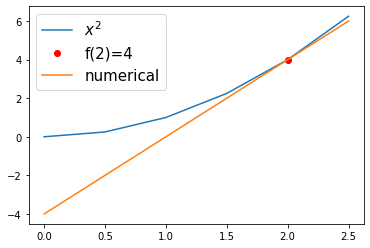

In [5]:
x = np.arange(0,3,h) 
y = x**2
y_num = pendiente*x-4
plt.plot(x,y, label = "$x^2$")
plt.plot(2,4,"ro", label = "f(2)=4")
plt.plot(x,y_num, label = "numerical")
plt.legend(fontsize=15)

**Ejercicio 2:**

Consideremos la función $f(x)=cos(x)$. Utilice el  método central de diferencias finitas para aproximar la derivada en el intervalo $[-3\pi /2,3\pi/2]$

In [6]:
def f_cosine(x):
    return np.cos(x)

In [7]:
def central(f,x,h):
    return (f(x+h)-f(x-h))/(2*h)

In [8]:
central(f_cosine,np.pi/2,h)

-0.958851077208406

In [9]:
h=0.9
x = np.arange(-3*np.pi/2,3*np.pi/2,.1)
sol_num = central(f_cosine,x,h)
y = np.cos(x)
y_prime = -np.sin(x)

(-3.141592653589793, 3.141592653589793)

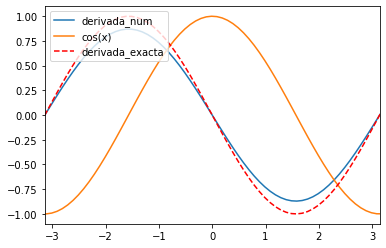

In [10]:
plt.plot(x,sol_num, label = "derivada_num")
plt.plot(x,y, label = "cos(x)")
plt.plot(x,y_prime, "r--" , label = "derivada_exacta")
plt.legend(loc = "upper left")
#plt.ylim(-2,2)
plt.xlim(-np.pi,np.pi)

CAlculemos la derivada para diferentes valores de h:

In [24]:
h = 1
iterations = 10
step_size =[]
max_error = []

for i in range(iterations):
    h = h/2 # definimos valor de h
    step_size.append(h) #guardamos los valores que toma h
    x = np.arange(0, 2*np.pi,h) #definimos la partición
    central_derivate = central(f_cosine,x,step_size[i])
    exact_solution= -np.sin(x)
    max_error.append(max(abs(exact_solution-central_derivate)))
step_size,max_error;

Y grafiquemos la diferencia entre la solución analítica y numérica en fucnion de h:

Text(0, 0.5, 'exacta-numérica')

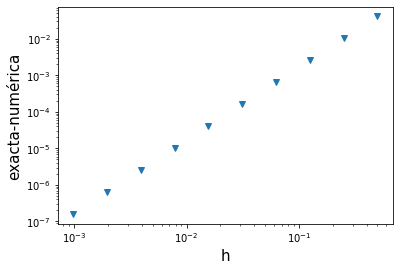

In [26]:
plt.loglog(step_size,max_error, "v")
plt.xlabel("h", fontsize = 15)
plt.ylabel("exacta-numérica", fontsize =15)

Ahora consideremos la solucion númerica con el método de diferencias finitas forward

In [29]:
def forward_array(f,x,h):
    R = []
    y = f(x)
    i = 0
    while i <= len(x)-2:
        aux= (y[i+1]-y[i])/h
        R.append(aux)
        i += 1
    return np.array(R)

In [30]:
h=.25
x = np.arange(0, 2*np.pi,h)
y = np.cos(x)
y_prime = -np.sin(x)
sol_num = forward_array(f_cosine,x,h)
len(sol_num),len(x)

(25, 26)

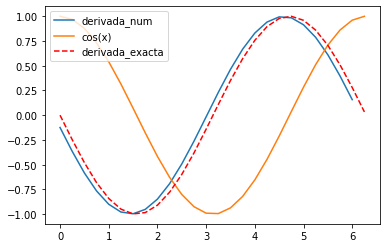

In [31]:
plt.plot(x[:-1],sol_num, label = "derivada_num")
plt.plot(x,y, label = "cos(x)")
plt.plot(x,y_prime, "r--" , label = "derivada_exacta")
plt.legend(loc = "upper left")
#plt.ylim(-2,2)
#plt.xlim(-np.pi,np.pi)

De igual manera, analizamos el error para central

In [32]:
h = 1
iterations = 20
step_size =[]
max_error = []

for i in range(iterations):
    h = h/2 # definimos valor de h
    step_size.append(h) #guardamos los valores que toma h
    x = np.arange(0, 2*np.pi,h) #definimos la partición
    forward_derivate = forward_array(f_cosine,x,step_size[i])
    #print(len(x),len(forward_derivate), len(exact_solution))
    exact_solution= -np.sin(x[:-1])
    max_error.append(max(abs(exact_solution-forward_derivate)))
step_size,max_error;

Text(0, 0.5, 'exacta-numérica')

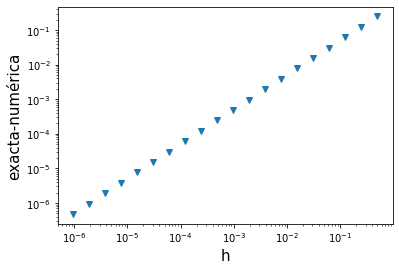

In [33]:
plt.loglog(step_size,max_error, "v")
plt.xlabel("h", fontsize =15)
plt.ylabel("exacta-numérica", fontsize =15)